In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_pred = os.path.join(pth_data, 'modeling', 'predict')
# pth_out = os.path.join(pth, 'figures', 'modeling')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_pred, 'CCCA_malignant.h5ad'))
adata

AnnData object with n_obs × n_vars = 1434229 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margin

In [ ]:
# vmin, vmax, cmap = 0, 1, 'inferno'

In [64]:
X_umap = adata.obs[['umap1', 'umap2']].astype(float).values
adata.obsm['X_umap'] = X_umap

/tmp/ipykernel_609875/2099267489.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue = df_plt.groupby(x).latent_z_bin.apply(np.bincount, minlength = edges.size - 1).apply(entropy)
/tmp/ipykernel_609875/2099267489.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_plt,
/tmp/ipykernel_609875/2099267489.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


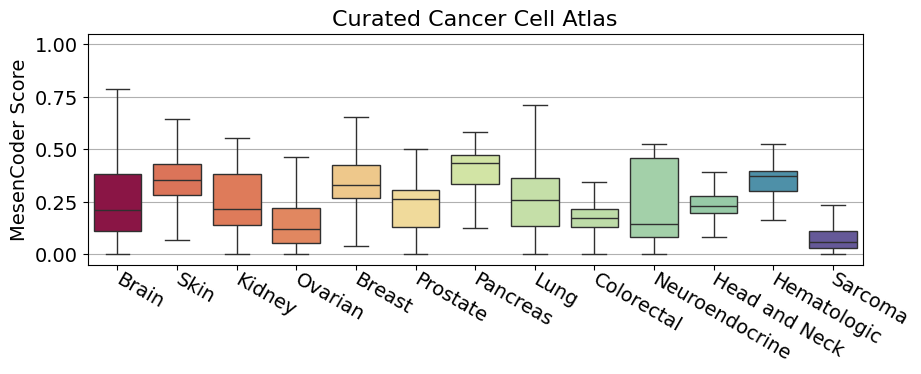

In [ ]:
# # curated cancer cell atlas
# fs1, fs2, rot, pad = 14, 16, -30, 6
fig, ax = plt.subplots(1, 1, figsize = (10, 3))
df_plt = adata.obs.copy()

from scipy.stats import entropy

x = 'Category'
edges = np.arange(0, 1.01, .01)
df_plt['latent_z_bin'] = pd.cut(df_plt.latent_z, edges, labels = False)
hue = df_plt.groupby(x).latent_z_bin.apply(np.bincount, minlength = edges.size - 1).apply(entropy)

ix = hue.sort_values(ascending = False).index
norm = Normalize(vmin = hue.min(), vmax = hue.max())
cmap_ = plt.get_cmap('Spectral_r')
get_color = lambda v: mcolors.to_hex(cmap_(norm(v)))
palette = hue.apply(get_color).to_dict()

sns.boxplot(df_plt,
               y = 'latent_z',
               x = x,
               # hue = 'Category',
               order = ix,
               showfliers = False,
               # inner = 'quart',
               # density_norm = 'width',
               palette = palette,
               ax = ax)
ax.set_ylabel('MesenCoder Score', size = fs1)
ax.set_xlabel('')
ax.set_title('Curated Cancer Cell Atlas', size = fs2)
ax.set_xticklabels(ax.get_xticklabels(),
                   size = fs1, rotation = rot,
                   rotation_mode = 'anchor',
                   ha = 'left', va = 'center')
ax.tick_params('x', pad = pad)
ax.tick_params('y', labelsize = fs1)
ax.grid(axis = 'y')
ax.set_ylim(vmin - .05, vmax + .05)
# ax.get_legend().set_visible(False)
# fn = os.path.join(pth_out, 'processed', 'malignant.pdf')
# plt.savefig(fn, bbox_inches = 'tight')
plt.show()